#Lab Assignment - 2
**2022-CS543 Reinforcement Learning Lab.** \\
Instructor : Shashi Shekhar Jha (shashi@iitrpr.ac.in)

**Due on 07-10-2022   2400 Hrs   (100 Marks)**

**Submission Instructions**:
All submissions are through google classroom, upload a single colab notebook with .ipynb extension. Go to file->Download-> Download .ipynb in colab to download the file. 

In case you face any trouble with the submission, please contact the TA:

Armaan Garg, 2019csz0002@iitrpr.ac.in	

Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.

Late submissions will attract penalties.

**Penalty Policy**: There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. For the 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.


**Naming Instructions**:
Name the colab file submission as follows: \<YourName>_\<rollnumber>_Lab2.ipynb 

E.g. if your name is ABC, roll number is 2022csx1234 and submission is for lab2 then you should name the colab file as: ABC_2022csx1234_lab2.ipynb


**This assignment will focus on the implementation of TD learning methods viz. the Q-learning and SARSA Algorithms on selected OpenAI Gym environments.**

**Template code is provided for reference/help and is optional to use**

# CartPole-v0 environment

https://www.gymlibrary.dev/environments/classic_control/cart_pole/


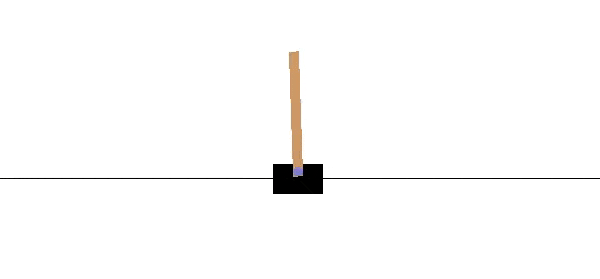




**Description**:
   

>  A pole is attached by an un-actuated joint to a cart, which moves along
    a frictionless track. The pendulum starts upright, and the goal is to
    prevent it from falling over by increasing and reducing the cart's
    velocity.



**Observation**:
 *   Num     Observation               Min                     Max
 *   0       Cart Position             -4.8                    4.8
 *   1       Cart Velocity             -Inf                    Inf
 *   2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
 *   3       Pole Angular Velocity     -Inf                    Inf




**Actions**:
   * Type: Discrete(2)
   * Num /  Action
   * 0  /   Push cart to the left
   * 1  /   Push cart to the right

    Note: The amount the velocity that is reduced or increased is not
    fixed; it depends on the angle the pole is pointing. This is because
    the center of gravity of the pole increases the amount of energy needed
    to move the cart underneath it

**Reward**:
    Reward is 1 for every step taken, including the termination step

**Starting State**:
    All observations are assigned a uniform random value in [-0.05..0.05]

**Episode Termination**:
  * Pole Angle is more than 12 degrees
    
  * Cart Position is more than 2.4 (center of the cart reaches the edge of
    the display).

  *  Episode length is greater than 200.

**Success Requirements**: Considered solved when the average return is greater than or equal to 195.0 over 100 consecutive trials.
    
    



```
# This is formatted as code
```

#  CarRacing-v0 environment from OpenAI Gym. 
https://www.gymlibrary.dev/environments/box2d/car_racing/

Description:

Easiest continuous control task to learn from pixels, a top-down racing environment. 

Discreet control is reasonable in this environment as well, on/off discretisation is fine. 

State consists of 96x96 pixels. 

Reward is -0.1 every frame and +1000/N for every track tile visited, where N is the total number of tiles in track. 

For example, if you have finished in 732 frames, your reward is 1000 - 0.1*732 = 926.8 points. Episode finishes when all tiles are visited.

**Note**

Since this notebook mounts google drive to store models, videos and json files, create a folder named 'RL2' in drive before running this. If you are running it on a local system, change variables *model_base_path, video_base_path, json_base_path* to appropriate directry path. 

It takes a lot of time to run this file and hence all the models videos and json dumps have been submitted as well.

# Installations

In [23]:
# install xvfb, a virtual X server
!apt-get install -y xvfb x11-utils
!pip install pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.11).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import pyvirtualdisplay
_display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
_ = _display.start()

In [25]:
!pip install gym==0.15.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
!pip install gym[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports and Helper Functions

In [27]:
import gym
from gym.wrappers import Monitor
from gym import logger as gymlogger
gymlogger.set_level(40) #error only
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import adam_v2
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import os
import glob
import io
import base64
import math
from IPython.display import HTML
from IPython import display as ipythondisplay
from collections import deque

In [28]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [29]:
def show_video(path):
  mp4list = glob.glob(path+'/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                 loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

In [30]:
model_base_path = './drive/MyDrive/RL2/model/'
video_base_path = './drive/MyDrive/RL2/video/'
json_base_path = './drive/MyDrive/RL2/json/'

# Questions [Total 100 points]


# ***On Cart-Pole*** 

Q1. Implement a Q-learning agent using a purely random behavior policy for the following learning rates $\alpha$ = [0.0001,0.001,0.01,0.05,0.1]. Observe whether the agent fulfills the success requirements (mentioned above) in each case. What is the effect of $\alpha$ on Q-learning? Demonstrate using plots. Plot the learning curve of the policies learnt in each case using  episode vs. avg reward/episode  **(20 points)**
 
Q2. Implement Q-Learning using the $\epsilon$-Greedy behaviour policy with  $\alpha$ = 0.0001 and $\epsilon$ = [0.9, 0.7, 0.5, 0.3, 0.2, 0.1]. What is the effect of $\epsilon$ on the performance of Q-Learning?  Support your arguments with valuable statistics and graphs. **(20 points)** 

Q3. How does the $\epsilon$-Greedy behaviour policy compare with the purely random behavior policy? Is the random behaviour policy a special case of $\epsilon$-Greedy? Comment. **(5 point)**

Q4.  Implement Q-Learning using the $\epsilon$-Greedy behaviour policy where $\epsilon$ is reduced from 1 to 0.01 with increasing number of episodes. Plot the learning curve of the policy being learnt using episode vs. avg reward/episode. **(10 points)**

***Note In all the above questions, render the cart-pole with the final learnt policy ***


## Q Learning

All models have been trained on 200 episodes and then has been trained on 100 episodes. Average over 100 episodes after training model on 200 episodes have been calculated. Video of one single episode after training is also shown. Graph of Average Return and Average reward per episode has been plotted of behaviour policy.

In [9]:
class QLearning:

  def __init__(self,env,gamma=0.99,alpha=0.001,epsilon=0.1,epsilon_delta=0.001,min_epsilon=0.01):
    self.env = env
    self.gamma = gamma
    self.alpha = alpha
    self.epsilon = epsilon 
    self.epsilon_delta = epsilon_delta
    self.min_epsilon = min_epsilon

    self.build_model()

    self.episode_return_list = []
  

  def build_model(self):
    self.model = Sequential()
    self.model.add(Dense(64,input_dim = self.env.observation_space.shape[0], activation= 'tanh'))
    self.model.add(Dense(self.env.action_space.n, activation = 'linear'))
    self.model.compile(loss = 'mse', optimizer = adam_v2.Adam(learning_rate = self.alpha))

  def select_action(self,state):
    if random.random()<self.epsilon: 
      return self.env.action_space.sample()
    else:
      return np.argmax(self.model.predict(state)[0])
        
  def update_epsilon(self):
    if self.epsilon > self.min_epsilon:
        self.epsilon = self.epsilon - self.epsilon_delta

  def learn(self,num_episodes=200):
    episode = 0
    while episode < num_episodes:
      episode += 1
      #print(episode,flush=True)
      episode_return = 0

      curr_state = np.reshape(self.env.reset(),[1,-1])
      
      
      self.update_epsilon()
      
      done = False
      while not done:
        action = self.select_action(curr_state)
        next_state, reward, done, info = self.env.step(action)
        next_state = np.reshape(next_state,[1,-1])

        episode_return += reward

        target = self.model.predict(curr_state)
        if done:
          target[0][action] = reward
        else:
          target[0][action] = reward+self.gamma*np.max(self.model.predict(next_state)[0])
        
        self.model.fit(curr_state,target,verbose = 0)

        curr_state = next_state
      
      self.episode_return_list.append(episode_return)

In [10]:
def run_trials(env,model,trials=100,render=False):
  trial_number = 0
  
  total_return = 0
  while trial_number < trials:
    trial_number += 1

    curr_state = np.reshape(env.reset(),[1,-1])

    if render:
      env.render()

    done = False
    episode_return = 0

    while not done:
      action = np.argmax(model.predict(curr_state)[0])
      next_state,reward, done,info = env.step(action)
      next_state = np.reshape(next_state,[1,-1])
      episode_return += reward
      curr_state = next_state

    total_return+= episode_return

  env.close()
  return total_return/trials

In [11]:
def plot_graph(episode_returns,label):
  num_episodes = len(episode_returns)
  average_returns = []
  sum = 0
  for i in range(num_episodes):
    sum += episode_returns[i]
    average_returns.append(sum/(i+1))
  
  plt.plot(list(range(1,num_episodes+1)),average_returns,label=label)


In [31]:
def write_json(path,json_str):
  path_list = path.split('/')
  curr_path = ''
  for i in range(len(path_list)-1):
    curr_path = os.path.join(curr_path,path_list[i])
    if not os.path.exists(curr_path):
      os.makedirs(curr_path)

  with open(path,'w') as f:
    f.write(json_str)
    f.close()

### Question 1

In [98]:
alpha_list = [0.0001,0.001,0.01,0.05,0.1]
relative_path = 'CartPole-v0/random-policy/'

In [ ]:
env = gym.make("CartPole-v0")

In [ ]:
for alpha in alpha_list:
  ql = QLearning(env,gamma=1,alpha=alpha,epsilon=1,epsilon_delta=0)
  ql.learn()
  ql.model.save(model_base_path+relative_path+str(alpha))

  json_return = json.dumps(ql.episode_return_list)

  write_json(json_base_path+relative_path+str(alpha)+'.json',json_return)

alpha= 0.0001 average returns= 9.23


alpha= 0.001 average returns= 30.49


alpha= 0.01 average returns= 131.56


alpha= 0.05 average returns= 72.09


alpha= 0.1 average returns= 105.45


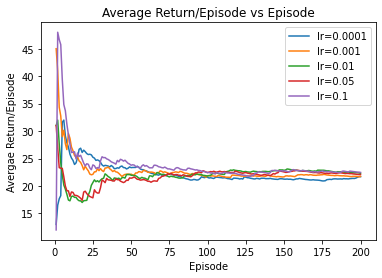

In [ ]:
for alpha in alpha_list:
  with open(json_base_path+relative_path+str(alpha)+'.json','r') as f:
    episode_return = json.loads(f.read())
    f.close()
    plot_graph(episode_return,'lr='+str(alpha))

  model = load_model(model_base_path+relative_path+str(alpha))

  results = run_trials(env,model)
  print('alpha=',alpha,'average returns=',results)

  env = Monitor(gym.make("CartPole-v0"),video_base_path+relative_path+str(alpha),force=True)
  run_trials(env,model,trials=1,render=True)
  show_video(video_base_path+relative_path+str(alpha))


plt.title('Average Return/Episode vs Episode')
plt.xlabel('Episode')
plt.ylabel('Avergae Return/Episode')
plt.legend()
plt.show()

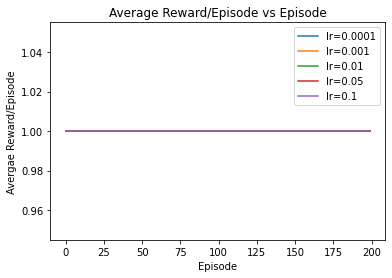

In [99]:
for alpha in alpha_list:
  plt.plot(list(range(200)),[1]*200,label='lr='+str(alpha))

plt.title('Average Reward/Episode vs Episode')
plt.xlabel('Episode')
plt.ylabel('Avergae Reward/Episode')
plt.legend()
plt.show()

**Observation**

Following are the average over 100 episodes

| Q Learning with Random Behavior Policy |
| --- |

| Alpha | Epsilon | Average Over 100 Runs |
| --- | --- | --- |
| 0.0001 | 1 | 9 |
| 0.001 | 1 | 30 |
| 0.01 | 1 | 130 |
| 0.05 | 1 | 72 |
| 0.1 | 1 | 105 |

Agent does not fulfill success requirement in any of the above case. 

As the agent learns,it does not collect a lot of rewards as it is using random behaviour policy and is not exploiting any of its learning. Average reward per episode is definitely 1 as it get 1 reward for each interaction. However, average return per epsiode varies with alpha. 

Effect of $\alpha$

If we keep $\alpha$ very less, the learning of agent would be very slow. However, if we keep $\alpha$ very large, learning would have large variance and stochasticity in episodes on which we train would effect learning.Moreover, since neural network has been used, large $\alpha$ can cause gradient descent to over shoot minima as well. 
We can see that performance improves as we incease $\alpha$ to 0.01 and then it starts to decrease.From results, which we see above we can see that $\alpha$=0.01 gives good result.

Variance in initial episode values is due to stochasticity and then average stbalises and grows slowly as the agent is not exploiting any of its learning.



### Question 2

In [100]:
epsilon_list = [0.9,0.7,0.5,0.3,0.2,0.1]
relative_path = 'CartPole-v0/fixed-epsilon/'

In [ ]:
for epsilon in epsilon_list:
  env = gym.make("CartPole-v0")
  ql = QLearning(env,gamma=1,alpha=0.0001,epsilon=epsilon,epsilon_delta=0)
  ql.learn()
  ql.model.save(model_base_path+relative_path+str(epsilon))

  json_return = json.dumps(ql.episode_return_list)

  write_json(json_base_path+relative_path+str(epsilon)+'.json',json_return)

epsilon= 0.9 average returns= 9.39


epsilon= 0.7 average returns= 9.35


epsilon= 0.5 average returns= 9.47


epsilon= 0.3 average returns= 9.41


epsilon= 0.2 average returns= 9.29


epsilon= 0.1 average returns= 9.23


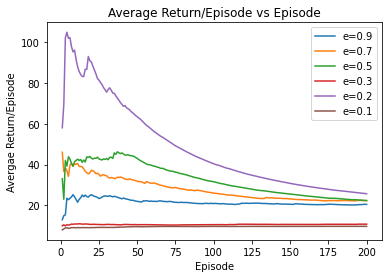

In [ ]:
for epsilon in epsilon_list:
  with open(json_base_path+relative_path+str(epsilon)+'.json','r') as f:
    episode_return = json.loads(f.read())
    f.close()
    plot_graph(episode_return,'e='+str(epsilon))

  model = load_model(model_base_path+relative_path+str(epsilon))

  results = run_trials(env,model)
  print('epsilon=',epsilon,'average returns=',results)

  env = Monitor(gym.make("CartPole-v0"),video_base_path+relative_path+str(epsilon),force=True)
  run_trials(env,model,trials=1,render=True)
  show_video(video_base_path+relative_path+str(epsilon))


plt.title('Average Return/Episode vs Episode')
plt.xlabel('Episode')
plt.ylabel('Avergae Return/Episode')
plt.legend()
plt.show()

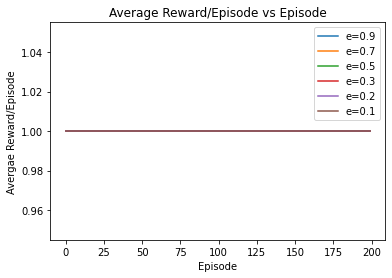

In [101]:
for epsilon in epsilon_list:
  plt.plot(list(range(200)),[1]*200,label='e='+str(epsilon))

plt.title('Average Reward/Episode vs Episode')
plt.xlabel('Episode')
plt.ylabel('Avergae Reward/Episode')
plt.legend()
plt.show()

**Observation**

Following are the average over 100 episodes

| Q Learning with $\epsilon$-greedy Behavior Policy |
| --- |

| Alpha | Epsilon | Average Over 100 Runs |
| --- | --- | --- |
| 0.0001 | 0.9 | 9 |
| 0.0001 | 0.7 | 9 |
| 0.0001 | 0.5 | 9 |
| 0.0001 | 0.3 | 9 |
| 0.0001 | 0.2 | 9 |
| 0.0001 | 0.1 | 9 |

Agent does not fulfill success requirement in any of the above case. 

As the agent learns,it does not collect a lot of rewards as the learning rate is very less and hence the learning is very slow.It would take much more episodes to train agent with this value of $\alpha$.  

Effect of $\epsilon$

If we keep value of $\epsilon$ too high, it will only explore and would not exploit its learning which would make learning very slow. However if we keep value of $\epsilon$ too low, it would not explore that much and hence it will take a lot of episodes to reach optimal action. Since, learning rate is very less, even changing epsilon is not having much effect on average. However, we can clearly see from the graph that $\epsilon$=0.2 - 0.5 perform better.


Variance in initial episode values is due to stochasticity and then average stbalises and grows slowly as the learning rate is very less.

### Question 3
Random behaviour policy is special case of $\epsilon$-greedy behaviour policy with $\epsilon$=1. Since, learning rate has been kept at 0.0001, both perform poorly. However, $\epsilon$-greedy behaviour policy perform a little better than random behaviour policy as $\epsilon$-greedy behaviour policy exploits its learning where in case of random behaviour policy, agent is taking actions randomly and not exploiting any learning.

### Question 4

In [ ]:
alpha_list = [0.0001,0.001,0.01,0.05,0.1]
relative_path = 'CartPole-v0/epsilon-delta/'

In [ ]:
for alpha in alpha_list:
  env = gym.make("CartPole-v0")
  ql = QLearning(env,gamma=1,alpha=alpha,epsilon=1,epsilon_delta=0.01)
  ql.learn()
  ql.model.save(model_base_path+relative_path+str(alpha))

  json_return = json.dumps(ql.episode_return_list)

  write_json(json_base_path+relative_path+str(alpha)+'.json',json_return)

alpha= 0.0001 average returns= 9.38


alpha= 0.001 average returns= 16.96


alpha= 0.01 average returns= 200.0


alpha= 0.05 average returns= 184.8


alpha= 0.1 average returns= 178.42


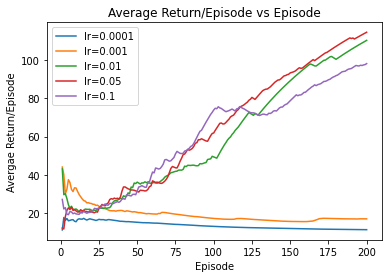

In [ ]:
for alpha in alpha_list:
  with open(json_base_path+relative_path+str(alpha)+'.json','r') as f:
    episode_return = json.loads(f.read())
    f.close()
    plot_graph(episode_return,'lr='+str(alpha))

  model = load_model(model_base_path+relative_path+str(alpha))

  results = run_trials(env,model)
  print('alpha=',alpha,'average returns=',results)

  env = Monitor(gym.make("CartPole-v0"),video_base_path+relative_path+str(alpha),force=True)
  run_trials(env,model,trials=1,render=True)
  show_video(video_base_path+relative_path+str(alpha))


plt.title('Average Return/Episode vs Episode')
plt.xlabel('Episode')
plt.ylabel('Avergae Return/Episode')
plt.legend()
plt.show()

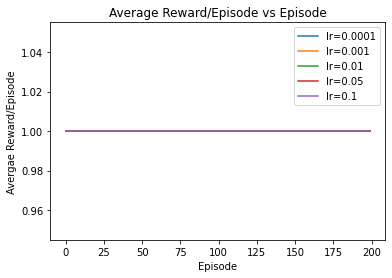

In [102]:
for alpha in alpha_list:
  plt.plot(list(range(200)),[1]*200,label='lr='+str(alpha))

plt.title('Average Reward/Episode vs Episode')
plt.xlabel('Episode')
plt.ylabel('Avergae Reward/Episode')
plt.legend()
plt.show()

**Observation**

Following are the average over 100 episodes

| Q Learning with $\epsilon$-greedy Behavior Policy |
| --- |

| Alpha | Average Over 100 Runs |
| --- |  --- |
| 0.0001 | 9 |
| 0.001 | 17 |
| 0.01 | 200 |
| 0.05 | 185 |
| 0.1 |  178 |

Agent  fulfill success requirement for $\alpha$=0.01. 

Effect of $\alpha$
If we keep $\alpha$ very less, the learning of agent would be very slow. However, if we keep $\alpha$ very large, learning would have large variance and stochasticity in episodes on which we train would effect learning.Moreover, since neural network has been used, large $\alpha$ can cause gradient descent to over shoot minima as well. 
We can see that performance improves as we incease $\alpha$ to 0.01. From results, which we see above we can see that $\alpha$=0.01 gives good result. Even $\alpha$=0.05 and $\alpha$=0.1 also gives decent results.


Variance in initial episode values is due to stochasticity and then average stbalises and grows very quickly for fairly large $\alpha$ value.

## ***On Car-Racing (Box 2D)*** 

Q1. Consider $Q_0$(s, a) = 0 $\forall$ (s,a),  $\epsilon= 0.1 $ and $\alpha$ = 0.01 and implement SARSA and Expected SARSA. Plot the graphs for:  episode vs. max-time step and episode vs. average-reward in each case. State your observations. Render 3 videos for the initial, mid and final stages of the learning process for both the methods. **(20 points).**

Q2. Experiment with different $\alpha$ = [0.0001,0.001,0.01,0.1] and $\epsilon$ = [0.9, 0.5, 0.3, 0.1] combination for SARSA and Expected  SARSA agents. Discuss how changing $\alpha$ and $\epsilon$ affect the agent’s learning performance. Include graphs to help with your explanation. Also comment on best combination along with rendering its video. **(15 points).**


Q3. Implement SARSA($\lambda$) with $\lambda = 0.5$ and the best combination of the $\alpha$ and $\epsilon$ values from the previous question Q2. Compare the performance of SARSA($\lambda$) with that of plain SARSA algorithm. **(10 points).**

Since the step function of the car racing environment is very slow, it has been trained on very less number of episodes and hence the performance is very poor. If it is trained on good enough number of episodes, it will perform good. Below written codes have number of episodes used for learning as parameter and can easily be trained for large enough number of episodes if computing capacity is available. Since,I have computation constraints, I have trained them for limited number of episodes.

In [13]:
class SARSA:
  def __init__(self,env,video_path,gamma=0.99,alpha=0.01,epsilon=0.1):
    self.env = env
    self.original_env = env

    self.gamma = gamma
    self.alpha = alpha
    self.epsilon = epsilon
    self.video_path = video_path

    self.build_model()
    self.discrete_actions = self.discretise_action_space()

    self.return_list = []
    self.time_step_list = []


  def discretise_action_space(self):
    disas = {}
    action_num = 0
    for steer in range(-2,2):
      for gas in range(0,2):
        for brake in range(0,2):
          disas[action_num] = (steer/2,gas/2,brake/2)
          action_num +=1

    return disas

  def wrap_env(self,path):
    self.env = Monitor(self.env,path,force=True)
  
  def unwrap_env(self):
    self.env = self.original_env
  
  def build_model(self):
    self.model = Sequential()
    self.model.add(Conv2D(filters=6, kernel_size=(6, 6), strides=4, activation='relu', input_shape=(96, 96, 3)))
    self.model.add(MaxPooling2D(pool_size=(2, 2)))
    self.model.add(Conv2D(filters=12, kernel_size=(4, 4), activation='relu'))
    self.model.add(MaxPooling2D(pool_size=(2, 2)))
    self.model.add(Flatten())
    self.model.add(Dense(256, activation='relu'))
    self.model.add(Dense(16, activation=None))
    self.model.compile(loss='mean_squared_error', optimizer=adam_v2.Adam(learning_rate=self.alpha, epsilon=1e-7))
  
  def select_action(self,state):
    if random.random()<self.epsilon:
      return random.randint(0,15)
    else:
      action_value = self.model.predict(state)
      return np.argmax(action_value[0])


  def learn(self,num_episodes=50):
    episode = 0
    while episode<num_episodes:

      if episode==0:
        self.wrap_env(self.video_path+'alpha='+str(self.alpha)+',epsilon='+str(self.epsilon)+'/initial')
      if episode ==num_episodes//2:
        self.wrap_env(self.video_path+'alpha='+str(self.alpha)+',epsilon='+str(self.epsilon)+'/mid')
      if episode==num_episodes-1:
        self.wrap_env(self.video_path+'alpha='+str(self.alpha)+',epsilon='+str(self.epsilon)+'/end')

      episode +=1

      curr_state = self.env.reset()
      curr_state = np.expand_dims(curr_state, axis=0)
      action_number = self.select_action(curr_state)
      action = self.discrete_actions[action_number]

      done = False
      num_steps = 0
      episode_return =0
      
      while not done:
        num_steps+=1
        next_state,reward,done,info = self.env.step(action)
        next_state = np.expand_dims(next_state, axis=0)
        
        episode_return += reward

        next_action_number = self.select_action(next_state)
        next_action = self.discrete_actions[next_action_number]

        if done:
          target = reward
        else:
          target = reward+self.gamma*(self.model.predict(next_state)[0][next_action_number])

        train_target = self.model.predict(curr_state)
        train_target[0][action_number] = target
        self.model.fit(curr_state,train_target,verbose=0)

        curr_state = next_state
        action_number = next_action_number
        action = next_action

      self.return_list.append(episode_return) 
      self.time_step_list.append(num_steps)
      self.unwrap_env()


In [47]:
class ExpectedSARSA:
  def __init__(self,env,video_path,gamma=0.99,alpha=0.01,epsilon=0.1):
    self.env = env
    self.original_env = env

    self.gamma = gamma
    self.alpha = alpha
    self.epsilon = epsilon
    self.video_path = video_path

    self.build_model()
    self.discrete_actions = self.discretise_action_space()

    self.return_list = []
    self.time_step_list = []
    

  def discretise_action_space(self):
    disas = {}
    action_num = 0
    for steer in range(-2,3):
      for gas in range(0,3):
        for brake in range(0,3):
          if gas >0 and brake>0:
            continue
          disas[action_num] = (steer/2,gas/2,brake/2)
          action_num +=1

    return disas

  def wrap_env(self,path):
    self.env = Monitor(self.env,path,force=True)
  
  def unwrap_env(self):
    self.env = self.original_env
  
  def build_model(self):
    self.model = Sequential()
    self.model.add(Conv2D(filters=6, kernel_size=(6, 6), strides=4, activation='relu', input_shape=(96, 96, 3)))
    self.model.add(MaxPooling2D(pool_size=(2, 2)))
    self.model.add(Conv2D(filters=12, kernel_size=(4, 4), activation='relu'))
    self.model.add(MaxPooling2D(pool_size=(2, 2)))
    self.model.add(Flatten())
    self.model.add(Dense(256, activation='relu'))
    self.model.add(Dense(20, activation=None))
    self.model.compile(loss='mean_squared_error', optimizer=adam_v2.Adam(learning_rate=self.alpha, epsilon=1e-7))
  
  def select_action(self,state):
    if random.random()<self.epsilon:
      return random.randint(0,19)
    else:
      action_value = self.model.predict(state)
      return np.argmax(action_value[0])


  def learn(self,num_episodes=50):
    episode = 0
    while episode<num_episodes:

      if episode==0:
        self.wrap_env(self.video_path+'alpha='+str(self.alpha)+',epsilon='+str(self.epsilon)+'/initial')
      if episode ==num_episodes//2:
        self.wrap_env(self.video_path+'alpha='+str(self.alpha)+',epsilon='+str(self.epsilon)+'/mid')
      if episode==num_episodes-1:
        self.wrap_env(self.video_path+'alpha='+str(self.alpha)+',epsilon='+str(self.epsilon)+'/end')

      episode +=1

      curr_state = self.env.reset()
      curr_state = np.expand_dims(curr_state, axis=0)
      

      done = False
      num_steps = 0
      episode_return =0
      
      while not done:
        num_steps+=1
        
        action_number = self.select_action(curr_state)
        action = self.discrete_actions[action_number]

        next_state,reward,done,info = self.env.step(action)
        next_state = np.expand_dims(next_state, axis=0)
        
        episode_return += reward

        if done:
          target = reward
        else:
          action_value = self.model.predict(next_state)[0]
          expectation = (1-self.epsilon)*max(action_value) + (self.epsilon*sum(action_value))/ len(action_value)
          target = reward+self.gamma*(expectation)

        train_target = self.model.predict(curr_state)
        train_target[0][action_number] = target
        self.model.fit(curr_state,train_target,verbose=0)

        curr_state = next_state
        

      self.return_list.append(episode_return) 
      self.time_step_list.append(num_steps)
      self.unwrap_env()

In [48]:
class SARSAlambda:
  def __init__(self,env,path_dict,lamda=0.5,gamma=0.99,alpha=0.01,epsilon=0.1):
    self.env = env
    self.original_env = env

    self.gamma = gamma
    self.alpha = alpha
    self.epsilon = epsilon
    self.lamda = lamda
    self.video_path = path_dict['video']
    self.model_path = path_dict['model']
    self.json_path  = path_dict['json']

    self.discrete_actions = self.discretise_action_space()
    self.num_actions = len(self.discrete_actions)
    self.model = self.build_model()
    self.target_model = self.build_model()
    

    self.return_list = []
    self.time_step_list = []
    memory_size  = 3
    self.memory = deque(maxlen = memory_size)

  def discretise_action_space(self):
    disas = {}
    action_num = 0
    for steer in range(-2,3):
      for gas in range(0,3):
        for brake in range(0,3):
          if gas >0 and brake>0:
            continue
          if steer>0 and gas>0:
            continue
          disas[action_num] = (steer/2,gas/2,brake/2)
          action_num +=1

    return disas

  def wrap_env(self,path):
    self.env = Monitor(self.env,path,force=True)
  
  def unwrap_env(self):
    self.env = self.original_env
  
  def build_model(self):
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(6, 6), strides=4, activation='relu', input_shape=(96, 96, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=12, kernel_size=(4, 4), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(self.num_actions, activation=None))
    model.compile(loss='mean_squared_error', optimizer=adam_v2.Adam(learning_rate=self.alpha, epsilon=1e-7))
    return model
  
  def select_action(self,state):
    if random.random()<self.epsilon:
      return random.randint(0,self.num_actions-1)
    else:
      action_value = self.model.predict(state)
      return np.argmax(action_value[0])

  def update_target_model(self):
    self.target_model.set_weights(self.model.get_weights())

  def learn(self,num_episodes=500):
    episode = 0
    while episode<num_episodes:

      if episode%10==0:
        self.update_target_model()
        self.target_model.save(self.model_path+str(episode))

        results = {}
        results['return'] = self.return_list
        results['max-time-step'] = self.time_step_list

        self.return_list = []
        self.time_step_list = []

        write_json(self.json_path+str(episode)+'.json',json.dumps(results))

      if episode%5==0:
        self.wrap_env(self.video_path+str(episode))
        

      episode +=1

      curr_state = self.env.reset()
      curr_state = np.expand_dims(curr_state, axis=0)
      action_number = self.select_action(curr_state)
      action = self.discrete_actions[action_number]

      done = False
      num_steps = 0
      episode_return =0
      
      while not done:
        num_steps+=1
        next_state,reward,done,info = self.env.step(action)
        next_state = np.expand_dims(next_state, axis=0)
        
        episode_return += reward

        next_action_number = self.select_action(next_state)
        next_action = self.discrete_actions[next_action_number]

        self.memory.append((curr_state,action_number,next_state,reward,done,next_action_number))

        lr = self.alpha
        for s,a,ns,r,d,na in reversed(self.memory):
          if done:
            target = reward
          else:
            target = reward+self.gamma*(self.target_model.predict(next_state)[0][next_action_number])
          
          train_target = self.model.predict(s)
          train_target[0][a] = target

          self.model.fit(curr_state,train_target,verbose=0)

          lr = lr*self.lamda*self.gamma
          self.model.optimizer.lr = lr

        curr_state = next_state
        action_number = next_action_number
        action = next_action

      self.return_list.append(episode_return) 
      self.time_step_list.append(num_steps)
      self.unwrap_env()


      

In [32]:
env = gym.make('CarRacing-v0')
relative_path = 'CarRacing-v0/sarsa/'

In [33]:
alpha_list = [0.1,0.01,0.001,0.0001]
epsilon_list = [0.1,0.3,0.5,0.9]

In [ ]:
for alpha in alpha_list:
  for epsilon in epsilon_list:

    
    param_str = 'alpha='+str(alpha)+',epsilon='+str(epsilon)
    sarsa = SARSA(env,video_base_path+relative_path,alpha=alpha,epsilon=epsilon)
    sarsa.learn()
    sarsa.model.save(model_base_path+relative_path+param_str)
    
    result = {}
    result['return'] = sarsa.return_list
    result['max-time-step'] = sarsa.time_step_list

    write_json(json_base_path+relative_path+param_str+'.json',json.dumps(result))

In [34]:
env = gym.make('CarRacing-v0')
relative_path = 'CarRacing-v0/expected-sarsa/'

In [35]:
alpha_list = [0.1,0.01,0.001,0.0001]
epsilon_list = [0.1,0.3,0.5,0.9]

In [ ]:
for alpha in alpha_list:
  for epsilon in epsilon_list:

    param_str = 'alpha='+str(alpha)+',epsilon='+str(epsilon)
    e_sarsa = ExpectedSARSA(env,video_base_path+relative_path,alpha=alpha,epsilon=epsilon)
    e_sarsa.learn()
    e_sarsa.model.save(model_base_path+relative_path+param_str)
    
    result = {}
    result['return'] = e_sarsa.return_list
    result['max-time-step'] = e_sarsa.time_step_list

    write_json(json_base_path+relative_path+param_str+'.json',json.dumps(result))

### Question 1
Model was trained on 50 episodes.

**SARSA**

In [36]:
alpha = 0.01
epsilon = 0.1
relative_path = 'CarRacing-v0/sarsa/'

print('Initial')
show_video(video_base_path+relative_path+'alpha='+str(alpha)+',epsilon='+str(epsilon)+'/initial')

print('Middle')
show_video(video_base_path+relative_path+'alpha='+str(alpha)+',epsilon='+str(epsilon)+'/mid')

print('End')
show_video(video_base_path+relative_path+'alpha='+str(alpha)+',epsilon='+str(epsilon)+'/end')

Initial


Middle


End


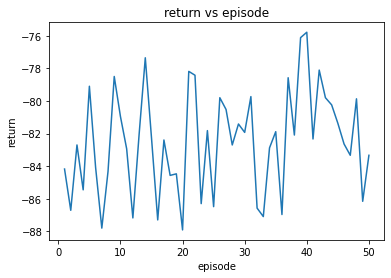

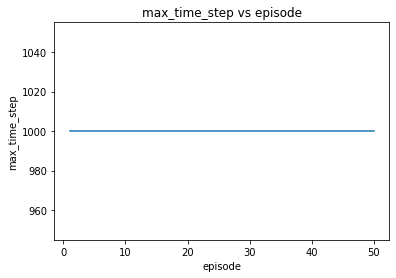

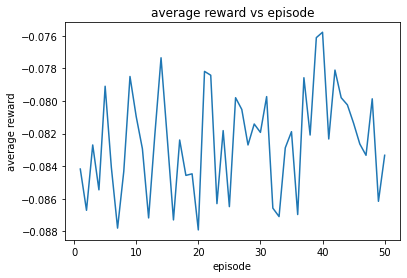

In [ ]:
param_str = 'alpha='+str(alpha)+',epsilon='+str(epsilon)

with open(json_base_path+relative_path+param_str+'.json','r') as f:
    results = json.loads(f.read())
    f.close()
    episode_return = results['return']
    max_time_step = results['max-time-step']

    plt.plot(list(range(1,len(episode_return)+1)),episode_return)
    plt.title('return vs episode')
    plt.xlabel('episode')
    plt.ylabel('return')
    plt.show()

    plt.plot(list(range(1,len(episode_return)+1)),max_time_step)
    plt.title('max_time_step vs episode')
    plt.xlabel('episode')
    plt.ylabel('max_time_step')
    plt.show()

    average_reward = [episode_return[i]/max_time_step[i] for i in range(len(episode_return))]
    plt.plot(list(range(1,len(episode_return)+1)),average_reward)
    plt.title('average reward vs episode')
    plt.xlabel('episode')
    plt.ylabel('average reward')
    plt.show()



**Expected SARSA**

In [84]:
alpha = 0.01
epsilon = 0.1
relative_path = 'CarRacing-v0/expected-sarsa/'

print('Initial')
show_video(video_base_path+relative_path+'alpha='+str(alpha)+',epsilon='+str(epsilon)+'/initial')

print('Middle')
show_video(video_base_path+relative_path+'alpha='+str(alpha)+',epsilon='+str(epsilon)+'/mid')

print('End')
show_video(video_base_path+relative_path+'alpha='+str(alpha)+',epsilon='+str(epsilon)+'/end')

Initial


Middle


End


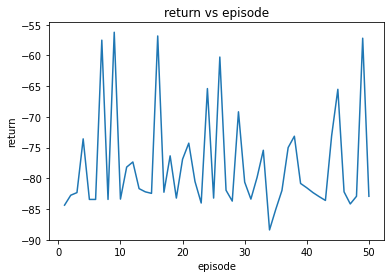

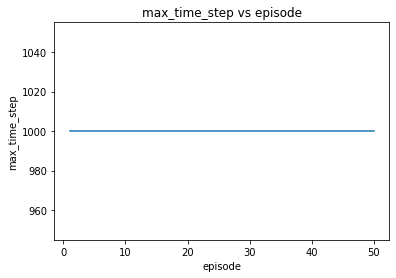

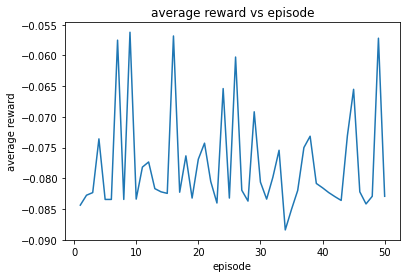

In [ ]:
param_str = 'alpha='+str(alpha)+',epsilon='+str(epsilon)

with open(json_base_path+relative_path+param_str+'.json','r') as f:
    results = json.loads(f.read())
    f.close()
    episode_return = results['return']
    max_time_step = results['max-time-step']

    plt.plot(list(range(1,len(episode_return)+1)),episode_return)
    plt.title('return vs episode')
    plt.xlabel('episode')
    plt.ylabel('return')
    plt.show()

    plt.plot(list(range(1,len(episode_return)+1)),max_time_step)
    plt.title('max_time_step vs episode')
    plt.xlabel('episode')
    plt.ylabel('max_time_step')
    plt.show()

    average_reward = [episode_return[i]/max_time_step[i] for i in range(len(episode_return))]
    plt.plot(list(range(1,len(episode_return)+1)),average_reward)
    plt.title('average reward vs episode')
    plt.xlabel('episode')
    plt.ylabel('average reward')
    plt.show()


**Observation**

I could train models only for 50 episodes as there was compute constraints. SARSA performed a little better during training of these 50 episodes. 
In case of SARSA, it learnt to go straight during these 50 episodes while in case of expected SARSA, it learnt to avoid skidding.(From what we could see from rendered videos).

Variance is very large in results. Agent is learning very slowly. In all the episodes, max time step is 1000 and agent has not learnt yet to minimise time step taken. 

### Question 2

Model was trained for 50 episodes.

**SARSA**

In [92]:
alpha_list = [0.1,0.01,0.001,0.0001]
epsilon_list = [0.1,0.3,0.5,0.9]
relative_path = 'CarRacing-v0/sarsa/'

In [93]:
results = {}
for alpha in alpha_list:
  results[alpha] = {}
  for epsilon in epsilon_list:
    param_str = 'alpha='+str(alpha)+',epsilon='+str(epsilon)
    with open(json_base_path+relative_path+param_str+'.json','r') as f:
      results[alpha][epsilon] = json.loads(f.read())
      if alpha==0.1 and epsilon==0.5:
        sarsa_return_list = results[alpha][epsilon]['return'][:20]
      print('alpha=',alpha,'epsilon=',epsilon,'average over 50 episodes:',sum(results[alpha][epsilon]['return'])/50)
      f.close()





alpha= 0.1 epsilon= 0.1 average over 50 episodes: -83.1253333463645
alpha= 0.1 epsilon= 0.3 average over 50 episodes: -71.18569482039992
alpha= 0.1 epsilon= 0.5 average over 50 episodes: -53.27331663416192
alpha= 0.1 epsilon= 0.9 average over 50 episodes: -63.690998019872765
alpha= 0.01 epsilon= 0.1 average over 50 episodes: -82.49325796063762
alpha= 0.01 epsilon= 0.3 average over 50 episodes: -58.81395467599125
alpha= 0.01 epsilon= 0.5 average over 50 episodes: -80.05748025301051
alpha= 0.01 epsilon= 0.9 average over 50 episodes: -56.55166746666596
alpha= 0.001 epsilon= 0.1 average over 50 episodes: -83.78158501960301
alpha= 0.001 epsilon= 0.3 average over 50 episodes: -57.30905494033453
alpha= 0.001 epsilon= 0.5 average over 50 episodes: -77.00626934806172
alpha= 0.001 epsilon= 0.9 average over 50 episodes: -55.15176808446927
alpha= 0.0001 epsilon= 0.1 average over 50 episodes: -89.50570663847891
alpha= 0.0001 epsilon= 0.3 average over 50 episodes: -70.68920642231069
alpha= 0.0001 ep

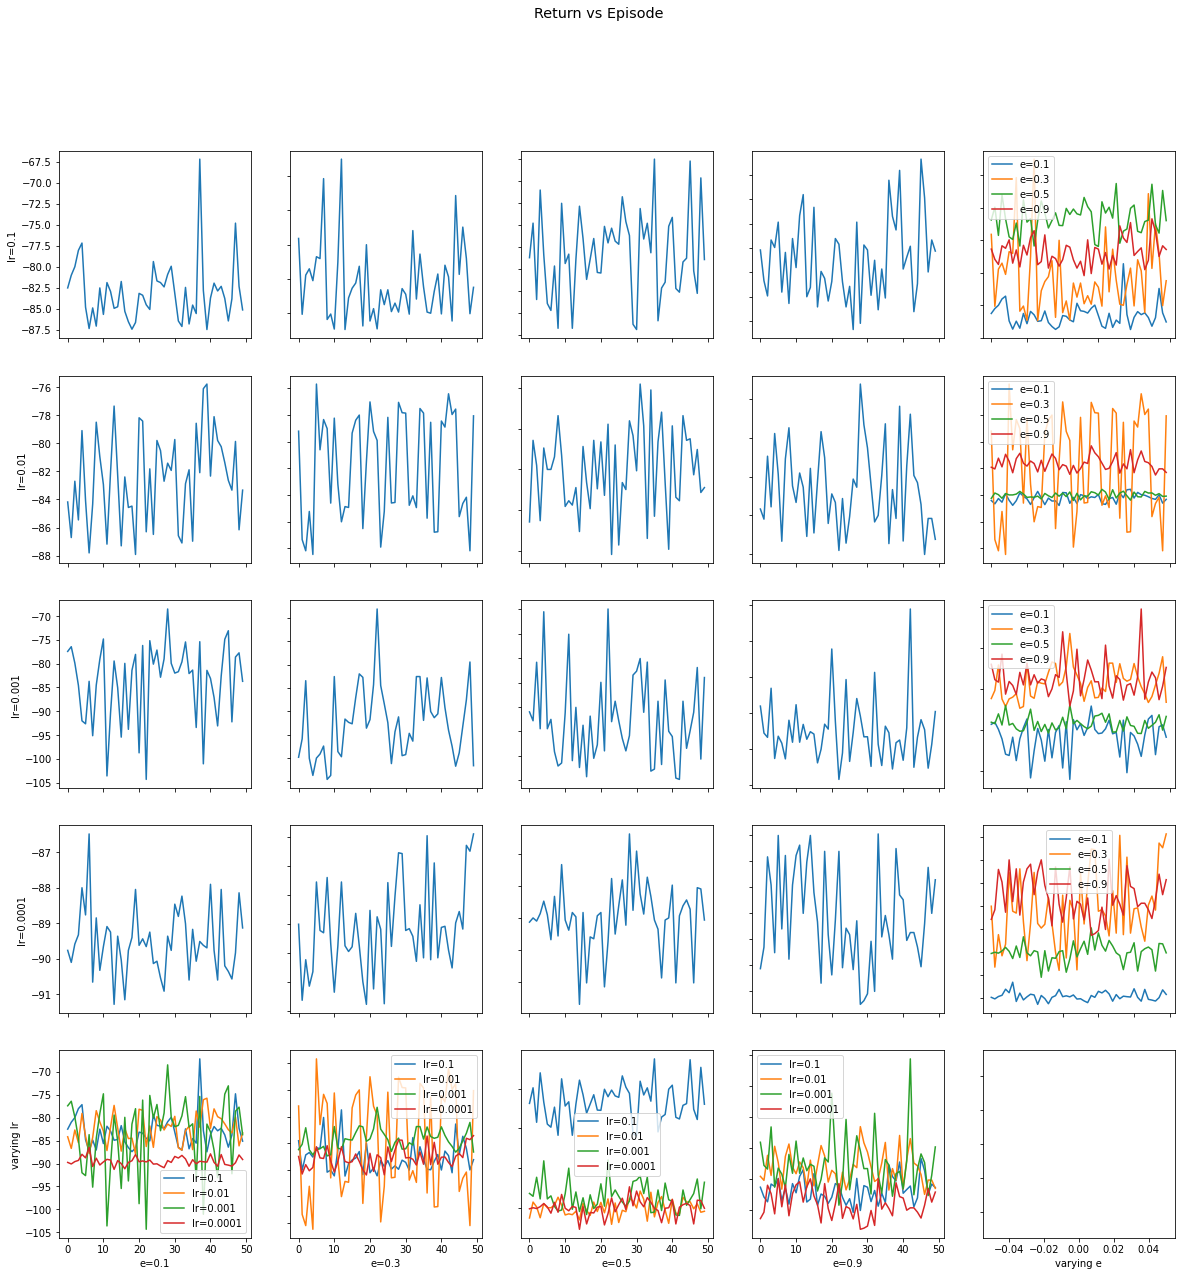

In [79]:
fig = plt.figure(figsize=(20,20))
st = plt.suptitle("Return vs Episode", fontsize="x-large")

x = list(range(50))

for i in range(5):
  for j in range(5):
    if i==4 and j!=4:
      plt.subplot(5,5,5*i+j+1)
      for alpha in alpha_list:
        plt.plot(x,results[alpha][epsilon_list[j]]['return'],label='lr='+str(alpha))
        plt.legend()
      continue
    if j==4 and i!=4:
      plt.subplot(5,5,5*i+j+1)
      for epsilon in epsilon_list:
        plt.plot(x,results[alpha_list[i]][epsilon]['return'],label='e='+str(epsilon))
        plt.legend()
      continue
    if i==4 and j==4:
      plt.subplot(5,5,5*i+j+1)
      plt.plot([],[])
      continue
    plt.subplot(5,5,5*i+j+1)
    plt.plot(x,results[alpha_list[i]][epsilon_list[j]]['return'])


fig.axes[0].set_ylabel('lr='+str(alpha_list[0]))
fig.axes[5].set_ylabel('lr='+str(alpha_list[1]))
fig.axes[10].set_ylabel('lr='+str(alpha_list[2]))
fig.axes[15].set_ylabel('lr='+str(alpha_list[3]))
fig.axes[20].set_ylabel('varying lr')

fig.axes[20].set_xlabel('e='+str(epsilon_list[0]))
fig.axes[21].set_xlabel('e='+str(epsilon_list[1]))
fig.axes[22].set_xlabel('e='+str(epsilon_list[2]))
fig.axes[23].set_xlabel('e='+str(epsilon_list[3]))
fig.axes[24].set_xlabel('varying e')

for ax in fig.get_axes():
    ax.label_outer()

plt.show()


In [81]:
alpha_list = [0.1,0.01,0.001,0.0001]
epsilon_list = [0.1,0.3,0.5,0.9]
relative_path = 'CarRacing-v0/expected-sarsa/'

In [82]:
results = {}
for alpha in alpha_list:
  results[alpha] = {}
  for epsilon in epsilon_list:
    param_str = 'alpha='+str(alpha)+',epsilon='+str(epsilon)
    with open(json_base_path+relative_path+param_str+'.json','r') as f:
      results[alpha][epsilon] = json.loads(f.read())
      print('alpha=',alpha,'epsilon=',epsilon,'average over 50 episodes:',sum(results[alpha][epsilon]['return'])/50)
      f.close()


alpha= 0.1 epsilon= 0.1 average over 50 episodes: -26.253112053362532
alpha= 0.1 epsilon= 0.3 average over 50 episodes: -80.26476020389438
alpha= 0.1 epsilon= 0.5 average over 50 episodes: -78.9800656565513
alpha= 0.1 epsilon= 0.9 average over 50 episodes: -70.62001050753052
alpha= 0.01 epsilon= 0.1 average over 50 episodes: -77.85592088042694
alpha= 0.01 epsilon= 0.3 average over 50 episodes: -80.93924587294121
alpha= 0.01 epsilon= 0.5 average over 50 episodes: -37.07057772153346
alpha= 0.01 epsilon= 0.9 average over 50 episodes: -70.04344223350785
alpha= 0.001 epsilon= 0.1 average over 50 episodes: -54.02533012883471
alpha= 0.001 epsilon= 0.3 average over 50 episodes: -82.89715946997973
alpha= 0.001 epsilon= 0.5 average over 50 episodes: -78.87955863704458
alpha= 0.001 epsilon= 0.9 average over 50 episodes: -71.03115482079815
alpha= 0.0001 epsilon= 0.1 average over 50 episodes: -89.86081546731658
alpha= 0.0001 epsilon= 0.3 average over 50 episodes: -82.4607545536228
alpha= 0.0001 eps

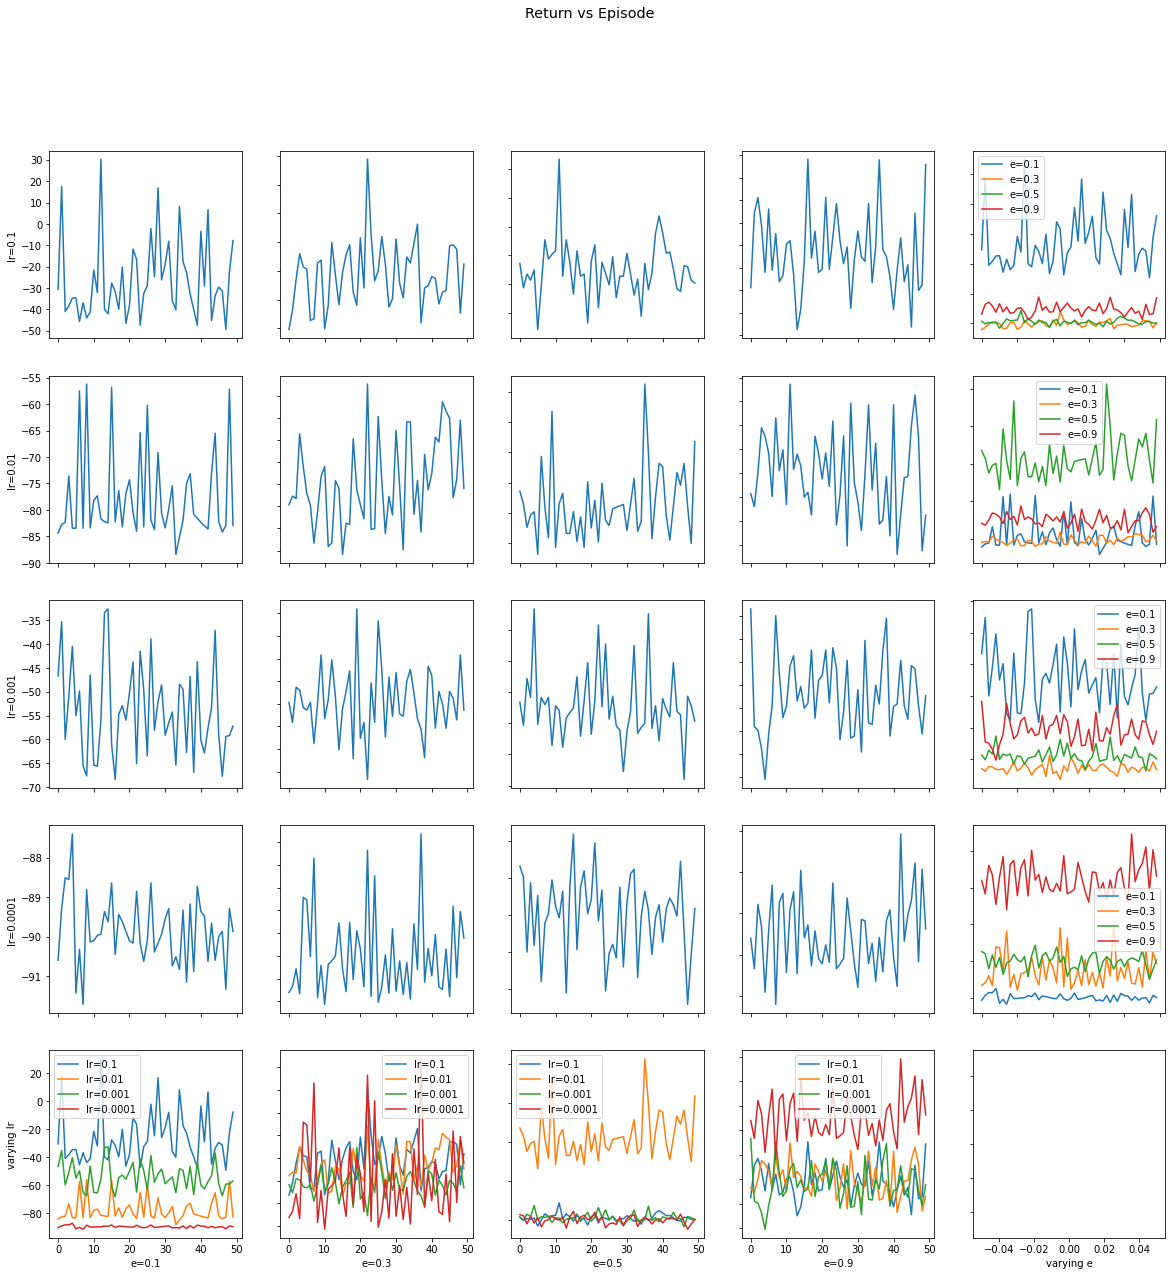

In [83]:
fig = plt.figure(figsize=(20,20))
st = plt.suptitle("Return vs Episode", fontsize="x-large")

x = list(range(50))

for i in range(5):
  for j in range(5):
    if i==4 and j!=4:
      plt.subplot(5,5,5*i+j+1)
      for alpha in alpha_list:
        plt.plot(x,results[alpha][epsilon_list[j]]['return'],label='lr='+str(alpha))
        plt.legend()
      continue
    if j==4 and i!=4:
      plt.subplot(5,5,5*i+j+1)
      for epsilon in epsilon_list:
        plt.plot(x,results[alpha_list[i]][epsilon]['return'],label='e='+str(epsilon))
        plt.legend()
      continue
    if i==4 and j==4:
      plt.subplot(5,5,5*i+j+1)
      plt.plot([],[])
      continue
    plt.subplot(5,5,5*i+j+1)
    plt.plot(x,results[alpha_list[i]][epsilon_list[j]]['return'])


fig.axes[0].set_ylabel('lr='+str(alpha_list[0]))
fig.axes[5].set_ylabel('lr='+str(alpha_list[1]))
fig.axes[10].set_ylabel('lr='+str(alpha_list[2]))
fig.axes[15].set_ylabel('lr='+str(alpha_list[3]))
fig.axes[20].set_ylabel('varying lr')

fig.axes[20].set_xlabel('e='+str(epsilon_list[0]))
fig.axes[21].set_xlabel('e='+str(epsilon_list[1]))
fig.axes[22].set_xlabel('e='+str(epsilon_list[2]))
fig.axes[23].set_xlabel('e='+str(epsilon_list[3]))
fig.axes[24].set_xlabel('varying e')

for ax in fig.get_axes():
    ax.label_outer()

plt.show()


**Observation**

Effect of changing $\epsilon$ and $\alpha$

For smaller value of $\alpha$, performance of model was better for larger value of $\epsilon$. However, as we increased $\alpha$, smaller values of $\epsilon$ started performing better.

SARSA gave best performance for $\alpha$=0.1 and $\epsilon$=0.5 \
Expected SARSA gave best performance for $\alpha$=0.1 and $\epsilon$=0.1

Videos have been rendered for best combination below.


In [86]:
print('SARSA')
alpha = 0.1
epsilon = 0.5
relative_path = 'CarRacing-v0/sarsa/'
show_video(video_base_path+relative_path+'alpha='+str(alpha)+',epsilon='+str(epsilon)+'/end')

print('Expected SARSA')
alpha = 0.1
epsilon = 0.1
relative_path = 'CarRacing-v0/expected-sarsa/'
show_video(video_base_path+relative_path+'alpha='+str(alpha)+',epsilon='+str(epsilon)+'/end')


SARSA


Expected SARSA


### Question 3
Model has been trained for 20 episodes, taking value of $\alpha$=0.1 and $\epsilon$=0.5.

In [94]:
relative_path = 'CarRacing-v0/sarsa-lamda/'
path_dict = {}
path_dict['video'] = video_base_path+relative_path 
path_dict['model'] = model_base_path+relative_path
path_dict['json'] =  json_base_path+relative_path

In [ ]:
sarsa_lambda = SARSAlambda(env,path_dict)
sarsa_lambda.learn(num_episodes=20)

In [95]:
episode_list = [10,20]

lamda_return_list = []
for episode in episode_list:
  with open(path_dict['json']+str(episode)+'.json','r') as f:
      lamda_return_list = lamda_return_list+ json.loads(f.read())['return']

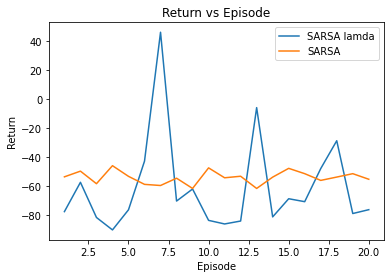

In [97]:
plt.plot(list(range(1,21)),lamda_return_list,label='SARSA lamda')
plt.plot(list(range(1,21)),sarsa_return_list,label='SARSA')

plt.title('Return vs Episode')
plt.xlabel('Episode')
plt.ylabel('Return')
plt.legend()
plt.show()

**Observation**

SARSA has less variance during training when compared to SARSA($λ$). However SARSA($λ$) performs better than SARSA. 
Since, SARSA($λ$) updates every state(I have updated only 3 states at each interaction though), it is very slow time wise.



---

